<a href="https://colab.research.google.com/github/zeyneppolat01/Data_Mining/blob/main/10_Metis_CENG464_Project_Python_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.feature_selection import SelectKBest, RFE, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    roc_curve,
    auc,
    confusion_matrix
)
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, StackingClassifier

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
excel_file = "10_Metis - CENG464 Project - Data.xlsx"
data = pd.read_excel('Course Project - Data for Classification - Electric Vehicles.xls')
data.shape


(6108, 75)

In [ ]:
data.head(4)

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,Q11_11,Q11_12,Q11_13,Q11_Dont_Know,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_Dont_Know,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q13_15,Q13_16,Q13_Dont_Know,Q14,Q15,Q17,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q18_15,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,2,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,A
1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,3,2,3,4,3,2,4,3,2,2,3,3,3,2,1,2,4,2,2,4,2,4,2,2,2,2,3,3,D
2,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1,5,?,4,?,4,4,4,4,4,4,?,4,?,4,?,?,4,4,?,?,4,2,4,4,1,A
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,?,2,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,3,3,C


In [ ]:
data.isnull().sum() #No null values, only "?" should imputed

Q11_1     0
Q11_2     0
Q11_3     0
Q11_4     0
Q11_5     0
         ..
Q18_22    0
Q18_23    0
Q20       0
Q21       0
Q16       0
Length: 75, dtype: int64

In [ ]:
#------------IMPUTE----------------------------
# Replace '?' with NaN for non-target columns
predictors = data.drop(columns=['Q16'])
predictors.replace('?', pd.NA, inplace=True)

# Convert non-target columns to numeric
for column in predictors.columns:
    predictors[column] = pd.to_numeric(predictors[column], errors='coerce')

# Apply KNN Imputer to non-target columns
knn_imputer = KNNImputer(n_neighbors=5)
predictors_imputed = pd.DataFrame(knn_imputer.fit_transform(predictors), columns=predictors.columns)

# Combine with the target column
dataset_imputed = pd.concat([predictors_imputed, data['Q16']], axis=1)

# # convert dataset to df
df1 = pd.DataFrame(dataset_imputed)
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    df1.to_excel(writer, sheet_name='dataset_imputed', index=False)


After Imputation we will have two approaches to try:

*   Transform the problem into Binary Classification Problem
*   Stay in the Multiclass problem

### **Transform the problem into Binary Classification Problem**

In [ ]:
#Copy dataset for Binary Transformation
binary_dataset_imputed = dataset_imputed.copy()

In [ ]:
# Check Statistics for each Class Labels
class_statistics = binary_dataset_imputed.groupby('Q16').mean()
class_statistics


,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,Q11_11,Q11_12,Q11_13,Q11_Dont_Know,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_Dont_Know,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q13_15,Q13_16,Q13_Dont_Know,Q14,Q15,Q17,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q18_15,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21
Q16,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.522026,0.284079,0.208810,0.634062,0.384669,0.099896,0.360388,0.279223,0.072147,0.476587,0.201873,0.047520,0.027402,0.024280,0.350330,0.270205,0.431495,0.650364,0.296566,0.108221,0.270552,0.192161,0.074922,0.423170,0.154700,0.057926,0.029830,0.028096,0.013181,0.351023,0.495664,0.359695,0.120361,0.397849,0.472425,0.362470,0.153659,0.372182,0.065557,0.301769,0.152619,0.254596,0.438085,0.016649,0.009018,0.018384,1.863267,1.677627,1.730350,3.814429,3.781061,3.551439,3.309331,3.262851,2.748040,2.797156,3.492473,3.667569,3.389455,2.693583,2.739507,2.742213,3.707735,2.712522,2.624905,3.233784,2.271800,3.203607,2.302879,3.001804,2.612487,2.623309,2.937218,2.301075
B,0.463303,0.341415,0.211664,0.543250,0.239187,0.108781,0.424640,0.340760,0.100262,0.420052,0.242464,0.077982,0.033421,0.020970,0.294233,0.283748,0.431193,0.563565,0.182831,0.137615,0.287680,0.208388,0.090433,0.346003,0.161861,0.080603,0.034731,0.066186,0.014417,0.321756,0.342726,0.304718,0.148100,0.382700,0.422674,0.261468,0.157274,0.346003,0.117955,0.291612,0.137615,0.288336,0.375491,0.026212,0.021625,0.020970,2.540105,1.579030,2.342464,3.323460,3.489253,3.213761,3.287025,3.047182,2.560288,2.749934,2.991350,3.392398,2.988467,2.544168,2.619397,2.367235,2.822936,2.393447,2.387025,3.009830,2.299214,3.043119,2.443906,2.797772,2.501311,2.497248,2.725426,2.553735
C,0.429372,0.306054,0.104260,0.548206,0.102018,0.063901,0.403587,0.373318,0.075112,0.374439,0.190583,0.067265,0.076233,0.134529,0.084081,0.086323,0.165919,0.218610,0.049327,0.035874,0.093049,0.078475,0.042601,0.119955,0.053812,0.040359,0.020179,0.612108,0.022422,0.133408,0.091928,0.073991,0.061659,0.171525,0.160314,0.059417,0.066143,0.178251,0.049327,0.102018,0.052691,0.164798,0.220852,0.040359,0.460762,0.076233,3.773991,1.843498,3.574888,2.547309,2.891031,2.624664,3.175785,2.713901,2.091256,2.618161,2.598879,2.922646,2.618386,2.461211,2.194395,2.064798,2.757623,2.095516,2.075336,2.522870,2.003812,2.494843,2.011211,2.260090,2.011435,1.985650,2.793722,3.355381
D,0.410161,0.239157,0.091698,0.522924,0.185874,0.044610,0.339529,0.232962,0.045849,0.369269,0.158612,0.026022,0.033457,0.224287,0.242875,0.206939,0.266419,0.478315,0.141264,0.054523,0.192069,0.112763,0.037175,0.291202,0.106568,0.034696,0.034696,0.135068,0.184634,0.245353,0.230483,0.157373,0.050805,0.265180,0.304833,0.153656,0.125155,0.282528,0.047088,0.177200,0.076828,0.201983,0.351921,0.022305,0.090458,0.234201,2.682528,1.864436,2.627261,3.369517,3.466171,3.227014,3.304833,3.072119,2.592317,2.849071,3.237175,3.381660,3.118216,2.539777,2.646344,2.539033,3.182652,2.564064,2.498141,2.965056,2.374969,2.994052,2.349442,2.840644,2.494919,2.502602,2.993804,2.895911


In [ ]:
from scipy.spatial.distance import pdist, squareform

# Sınıflar arasındaki farkların karelerinin toplamını hesaplayarak benzerlik matrisi oluşturma
distance_matrix = squareform(pdist(class_statistics, 'euclidean'))
# Benzerlik matrisini bir DataFrame'e dönüştürme ve sınıf isimleri ile etiketleme
distance_df = pd.DataFrame(distance_matrix, index=class_statistics.index, columns=class_statistics.index)
distance_df

Q16,A,B,C,D
Q16,,,,
A,0.000000,1.839257,4.586357,1.936413
B,1.839257,0.000000,3.069274,1.041734
C,4.586357,3.069274,0.000000,2.886108
D,1.936413,1.041734,2.886108,0.000000


However B and D is closer to each other,I pick A and B to combine, because "D" label is mean "I dont know" and i will eliminate that class and assign their sample to their nearest neighbor class

In [ ]:
#------------TARGET ADJUSTMENT FOR BINARY CLASSIFICATION--------------
# combine A and B
binary_dataset_imputed['Q16'] = binary_dataset_imputed['Q16'].replace({'A': 'AB', 'B': 'AB'})

# Assign D with KNN
dont_know_data = binary_dataset_imputed[binary_dataset_imputed['Q16'] == 'D']
known_data = binary_dataset_imputed[binary_dataset_imputed['Q16'] != 'D']

# split datasets for features and targets
X_known = known_data.drop(columns=['Q16'])
y_known = known_data['Q16']
X_dont_know = dont_know_data.drop(columns=['Q16'])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_known, y_known)

# assign 'Dont know'
dont_know_predictions = knn.predict(X_dont_know)

# add 'Dont know'
dont_know_data['Q16'] = dont_know_predictions

# concat new dataset
binary_dataset_imputed = pd.concat([known_data, dont_know_data])

#-------------TARGET ENCODING---------------
binary_dataset_imputed["Q16"] = binary_dataset_imputed["Q16"].map({"AB":0, "C":1})

binary_dataset_imputed.head(8)

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,Q11_11,Q11_12,Q11_13,Q11_Dont_Know,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_Dont_Know,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q13_15,Q13_16,Q13_Dont_Know,Q14,Q15,Q17,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q18_15,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,4.2,4.0,3.6,4.0,4.0,4.0,4.0,4.0,4.0,3.6,4.0,3.6,4.0,3.4,3.8,4.0,4.0,3.6,2.6,4.0,2.0,4.0,4.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.2,2.0,3.4,3.8,4.2,2.8,3.6,3.4,2.4,3.4,2.8,3.6,3.4,3.0,2.4,2.2,4.0,3.6,4.4,2.4,2.2,2.4,3.0,3.0,2.8,2.4,3.0,3.0,1
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,3.0,3.0,3.0,1.0,0
7,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,0
8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,3.0,4.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,4.0,0


<Axes: ylabel='Q16'>

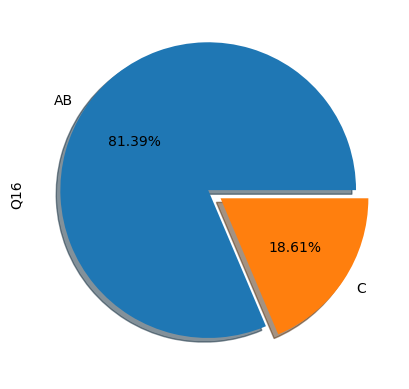

In [ ]:
binary_dataset_imputed["Q16"].value_counts().plot.pie(explode = [0.050,0.050], autopct="%1.2f%%",shadow = True,labels = ["AB","C"])

As we can see from the result, Binary Transformed Dataset is REALLY IMBALANCED!!

In [ ]:
#-------------SCALING FOR BINARY---------------
binary_X = binary_dataset_imputed.drop("Q16", axis=1)
binary_y = binary_dataset_imputed["Q16"]
scaler = MinMaxScaler()
binary_X_min_max = pd.DataFrame(scaler.fit_transform(binary_X))

#----------FEATURE SELECTION FOR BINARY--------------
from sklearn.feature_selection import RFECV

# Assuming X_min_max and y are your dataset features and target
binary_X_train, binary_X_test, binary_y_train, binary_y_test = train_test_split(binary_X_min_max, binary_y, test_size=0.2, random_state=42)

# Choose a lightweight model for RFE
rf_model  = RandomForestClassifier(random_state=42)

# Use RFECV to find the optimal number of features
rfecv = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(binary_X_train, binary_y_train)

print("Optimal number of features: ", rfecv.n_features_)
# Transform the data to retain only the selected features
binary_X_train_selected = rfecv.transform(binary_X_train)
binary_X_test_selected = rfecv.transform(binary_X_test)


Optimal number of features:  49


Test Accuracy: 0.8960720130932897
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       966
           1       0.85      0.61      0.71       256

    accuracy                           0.90      1222
   macro avg       0.88      0.79      0.82      1222
weighted avg       0.89      0.90      0.89      1222

Training Accuracy: 1.0
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4005
           1       1.00      1.00      1.00       881

    accuracy                           1.00      4886
   macro avg       1.00      1.00      1.00      4886
weighted avg       1.00      1.00      1.00      4886



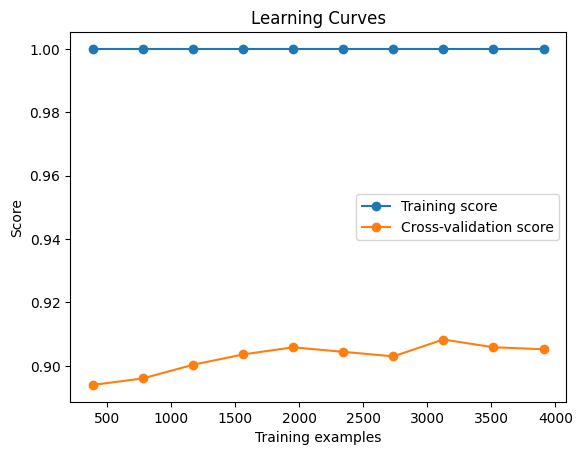

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
# Train the model
rf_model.fit(binary_X_train_selected, binary_y_train)

# Test Seti Üzerinde Tahminler ve Performans Değerlendirme
binary_y_pred_test = rf_model.predict(binary_X_test_selected)
test_accuracy = accuracy_score(binary_y_test, binary_y_pred_test)
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report (Test Set):\n", classification_report(binary_y_test, binary_y_pred_test))

# Eğitim Seti Üzerinde Tahminler ve Performans Değerlendirme
binary_y_pred_train = rf_model.predict(binary_X_train_selected)
train_accuracy = accuracy_score(binary_y_train, binary_y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print("Classification Report (Training Set):\n", classification_report(binary_y_train, binary_y_pred_train))

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, binary_X_train_selected, binary_y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.legend(loc="best")
plt.show()

However Accuracy is high from this approach; As we can see from the Learning Curve, the approach is unsuccesfull due to it's Overfitting.


### **Moving on with the Multiclass Classification Approach**

In [ ]:
#target is converted to numeric
dataset_imputed["Q16"] = dataset_imputed["Q16"].map({"A":0,"B":1,"C":2,"D":3})

df3 = pd.DataFrame(dataset_imputed)
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    df3.to_excel(writer, sheet_name='dataset_imputed_numeric_target', index=False)
dataset_imputed.head(8)

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,Q11_11,Q11_12,Q11_13,Q11_Dont_Know,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_Dont_Know,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q13_15,Q13_16,Q13_Dont_Know,Q14,Q15,Q17,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q18_15,Q18_16,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,3.0,3
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,4.2,4.0,3.6,4.0,4.0,4.0,4.0,4.0,4.0,3.6,4.0,3.6,4.0,3.4,3.8,4.0,4.0,3.6,2.6,4.0,2.0,4.0,4.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.2,2.0,3.4,3.8,4.2,2.8,3.6,3.4,2.4,3.4,2.8,3.6,3.4,3.0,2.4,2.2,4.0,3.6,4.4,2.4,2.2,2.4,3.0,3.0,2.8,2.4,3.0,3.0,2
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.2,2.0,2.0,3.4,4.0,3.4,3.2,2.0,2.2,2.2,3.2,4.2,3.4,2.0,2.2,3.4,3.6,2.0,1.6,2.8,2.2,1.0,1.0,2.2,1.8,2.4,3.0,3.0,3
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,1
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,3.0,3.0,3.0,1.0,0
7,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,0


<Axes: ylabel='Q16'>

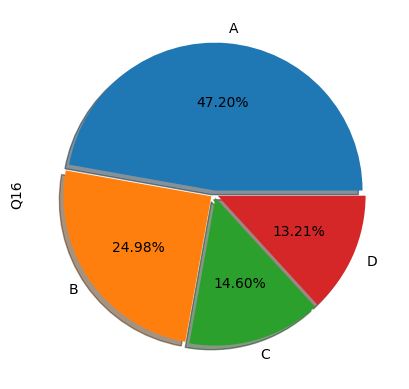

In [ ]:
dataset_imputed["Q16"].value_counts().plot.pie(explode = [0.025,0.025,0.025,0.025], autopct="%1.2f%%",shadow = True,labels = ["A","B","C","D"])


As we can see from the result; dataset is imbalanced, we will apply Balancing techniques

<Axes: ylabel='Q16'>

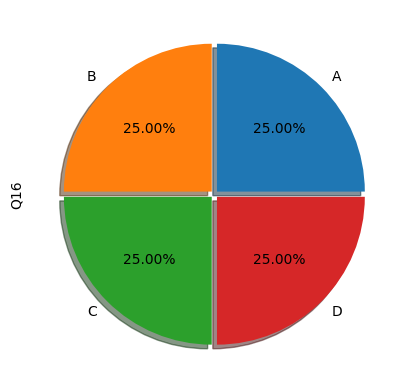

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

X = dataset_imputed.drop("Q16", axis=1)
y = dataset_imputed["Q16"]
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
new_data["Q16"].value_counts().plot.pie(
    explode=[0.025, 0.025, 0.025,0.025],
    autopct="%1.2f%%",
    shadow=True,
    labels=["A", "B", "C","D"],
)
df4 = pd.DataFrame(new_data)
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    df4.to_excel(writer, sheet_name='balanced_dataset', index=False)


In [ ]:
#-------------SCALE---------------
X = new_data.drop("Q16", axis=1)
y = new_data["Q16"]
scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))
df5 = pd.DataFrame(X_min_max)
with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    df5.to_excel(writer, sheet_name='Scaled_dataset_without_target', index=False)

**Feature Selection and Machine Learning Algorithms**


Feature Selection Algorithms:

*   Lasso
*   Ridge
*   RFE
*   RFECV

Machine Learning Algorithms:


*   Random Forest
*   Decision Tree
*   Gradient Boosting
*   SVM
*   KNeighborsClassifier
*   LogisticRegression (OneVsRest)
*   LogisticRegression (OneVsOne)
*   GaussianNB
*   AdaBoostClassifier
*   MLPClassifier
*   XGBClassifier
*   ExtraTreesClassifier






In [ ]:
#-------------FEATURE SELECTION METHODS---------------
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

def select_kbest(X, y, method, k):
    k_best = SelectKBest(score_func=method, k=k)
    selected = k_best.fit_transform(X, y)
    return selected

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_min_max, y)
lasso_selected_features = X_min_max.columns[abs(lasso.coef_) > 0]

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_min_max, y)
ridge_selected_features = X_min_max.columns[abs(ridge.coef_) > 0]

# RFE
rfe = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=15)
rfe.fit(X_min_max, y)
rfe_selected_features = X_min_max.columns[rfe.support_]

# RFECV
rfecv = RFECV(estimator=RandomForestClassifier(n_jobs=-1), step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_min_max, y)
rfecv_selected_features = X_min_max.columns[rfecv.support_]


selected_features = {
    "chi2": select_kbest(X_min_max, y, chi2, 15),
    "mic": select_kbest(X_min_max, y, mutual_info_classif, 15),
    "lasso": X_min_max[lasso_selected_features],
    "ridge": X_min_max[ridge_selected_features],
    "rfe": X_min_max[rfe_selected_features],
    "rfecv": X_min_max[rfecv_selected_features],
}

In [ ]:
# -----------APPLY COMBINATIONS OF EACH CLASSIFICATION MODELS WITH EACH FEATURE SELECTION METHODS------------------
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate

classifiers = {
        "RandomForestClassifier": RandomForestClassifier(n_jobs=-1),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "SVM": SVC(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression_OneVsRest": OneVsRestClassifier(LogisticRegression()),
        "LogisticRegression_OneVsOne": OneVsOneClassifier(LogisticRegression()),
        "GaussianNB": GaussianNB(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "MLPClassifier": MLPClassifier(),
        "XGBClassifier": XGBClassifier(),
        "ExtraTreesClassifier": ExtraTreesClassifier(n_jobs=-1),
}

best_model = None
best_score = 0.0
# Metrics for Cross-validation (multiclass adapted)
scoring_metrics = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc_ovr',  # AUC with OVR (One-vs-Rest)
    'f1_weighted': 'f1_weighted',  # for imbalanced class
    'precision_weighted': 'precision_weighted',  # for imbalanced class
    'recall_weighted': 'recall_weighted',  # for imbalanced class
    'mcc': 'matthews_corrcoef'  # Matthews correlation coefficient
}

# create DataFrame for results
results_df = pd.DataFrame(columns=['Method', 'Model', 'Accuracy', 'AUC', 'F1', 'Precision', 'Recall', 'MCC', 'Feature Count'])

# StratifiedKFold object for 5-fold stratified cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for method, features in selected_features.items():
    X = features
    y = new_data["Q16"]

    feature_count = X.shape[1]  # num of features that used

    for classifier_name, classifier in classifiers.items():
        # apply cross-validation for every model
        scores = cross_validate(classifier, X, y, cv=skf, scoring=scoring_metrics)
        results_df = results_df.append({
            'Method': method,
            'Model': classifier_name,
            'Accuracy': scores['test_accuracy'].mean(),
            'AUC': scores['test_roc_auc'].mean(),
            'F1': scores['test_f1_weighted'].mean(),
            'Precision': scores['test_precision_weighted'].mean(),
            'Recall': scores['test_recall_weighted'].mean(),
            'MCC': scores['test_mcc'].mean(),
            'Feature Count': feature_count
        }, ignore_index=True)

with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    results_df.to_excel(writer, sheet_name='model_evaluation_results', index=False)


In [ ]:
#----------TAKE BEST RESULTS FROM results_df TO SHOW WHICH COMBINATIONS ARE THE BEST----------------
def calculate_best_scores():
    best_scores = {"lasso": None, "chi2": None, "mic": None, "ridge": None, "rfe": None,"rfecv": None}

    for i, row in results_df.iterrows():
        current_best = best_scores[row["Method"]]

        if current_best is None or row["Accuracy"] > current_best["Accuracy"]:
            best_scores[row["Method"]] = row.to_dict()

    return best_scores

best_scores = calculate_best_scores()
best_scores_df = pd.DataFrame(list(best_scores.values()))
best_scores_df = best_scores_df.sort_values(by="Accuracy", ascending=False)
best_scores_df.head(8)

,Method,Model,Accuracy,AUC,F1,Precision,Recall,MCC,Feature Count
3,ridge,ExtraTreesClassifier,0.898370,0.982662,0.898052,0.899076,0.898370,0.864934,74
5,rfecv,ExtraTreesClassifier,0.895248,0.982673,0.894752,0.895698,0.895248,0.860797,65
4,rfe,ExtraTreesClassifier,0.875998,0.978760,0.875115,0.874814,0.875998,0.834849,15
2,mic,ExtraTreesClassifier,0.872096,0.977395,0.871004,0.870692,0.872096,0.829709,15
0,lasso,ExtraTreesClassifier,0.864811,0.972253,0.863397,0.862961,0.864811,0.820058,21
1,chi2,RandomForestClassifier,0.696498,0.903276,0.694086,0.693787,0.696498,0.595927,15


In [ ]:
#-------------ENSEMBLE METHODS------------------------
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef
from openpyxl import load_workbook

# Scoring metriklerini tanımla
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': 'roc_auc_ovr',
    'f1_weighted': 'f1_weighted',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'mcc': make_scorer(matthews_corrcoef)
}

# take best feature set (Our is rfecv since it is the most successfull one)
best_features = selected_features['rfecv']

# Models for max voting
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1)),
    ('et', ExtraTreesClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True))
]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train max voting model
voting_clf.fit(best_features, new_data["Q16"])
# Apply cross-validation for Voting
voting_scores = cross_validate(voting_clf, best_features, new_data["Q16"], cv=skf, scoring=scoring)
#print("Max Voting Accuracy:", scores.mean())


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Models for stacking
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1)),
    ('et', ExtraTreesClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1))
]

stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train Stacking model
stacking_clf.fit(best_features, new_data["Q16"])
# Apply cross-validation for Stacking model
stacking_scores = cross_validate(stacking_clf, best_features, new_data["Q16"], cv=skf, scoring=scoring)
#print("Stacking Accuracy:", scores.mean())

# Voting ve Stacking sonuçlarını DataFrame'lere dönüştür
def format_scores(scores, method_name):
    # Skorların ortalamasını al ve DataFrame oluştur
    mean_scores = {metric: np.mean(values) for metric, values in scores.items()}
    mean_scores['Method'] = method_name
    mean_scores['Model'] = method_name  # Model adı olarak method adını kullan
    mean_scores['Feature Count'] = best_features.shape[1]  # Özellik sayısını ekle
    return pd.DataFrame([mean_scores], columns=results_df.columns)

voting_df = format_scores(voting_scores, 'Voting')
stacking_df = format_scores(stacking_scores, 'Stacking')

# Her iki sonucu birleştir
ensemble_results_df = pd.concat([voting_df, stacking_df], ignore_index=True)



In [ ]:
# -----------RESULTS OF VOTING FROM ENSEMBLE METHODS-----------------------

print("RESULTS OF VOTING")
for metric in scoring.keys():
    print(f"{metric}: {np.mean(voting_scores['test_' + metric])}")
# -----------RESULTS OF STACKING FROM ENSEMBLE METHODS-----------------------
print("RESULTS OF STACKING")
for metric in scoring.keys():
    print(f"{metric}: {np.mean(stacking_scores['test_' + metric])}")

RESULTS OF VOTING
accuracy: 0.8728756817273571
roc_auc: 0.9741370975521967
f1_weighted: 0.8705370126965407
precision_weighted: 0.8713398425133366
recall_weighted: 0.8728756817273571
mcc: 0.8314915611073946
RESULTS OF STACKING
accuracy: 0.9046132833779014
roc_auc: 0.9838037062662339
f1_weighted: 0.9048079297037492
precision_weighted: 0.908857727029706
recall_weighted: 0.9046132833779014
mcc: 0.8741508392277624


Since best results coming from the **Stacking Ensemble Method**,


*   We will apply Hyperparameter for Stacking Model
*   Then create a Confusion Matrix


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV


# Hiperparametre ranges
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30, None],
    'et__n_estimators': [50, 100, 200],
    'et__max_depth': [10, 20, 30, None]
}

# hyperparameter searching with GridSearchCV for StackingClassifier
grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(best_features, new_data["Q16"])


print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)



En iyi hiperparametreler: {'et__max_depth': 30, 'et__n_estimators': 200, 'rf__max_depth': 30, 'rf__n_estimators': 200}
En iyi skor: 0.9060009676797227


In [ ]:
#excel_file = "10_Metis - CENG464 Project - Data (3).xlsx"
best_params_df = pd.DataFrame([grid_search.best_params_])
best_params_df['Best Score'] = grid_search.best_score_

with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
    best_params_df.to_excel(writer, sheet_name='Hyperparameters_from_GridSearch', index=False)

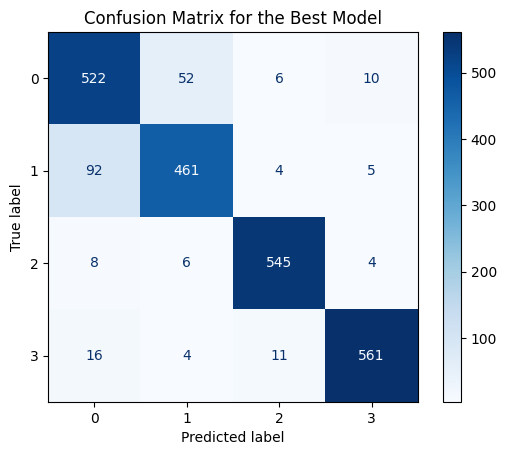

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# take the best model (after GridSearchCV )
best_model = grid_search.best_estimator_

# splitting
X_train, X_test, y_train, y_test = train_test_split(best_features, new_data["Q16"], test_size=0.2, random_state=42)

# train the  Model
best_model.fit(X_train, y_train)

#prediction on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# show Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Best Model')
plt.show()


# Comparison of Binary Approach and Multiclass Approach with **Learning Curves**

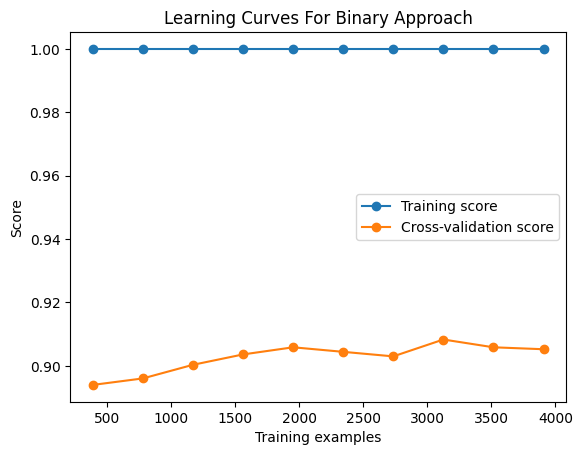

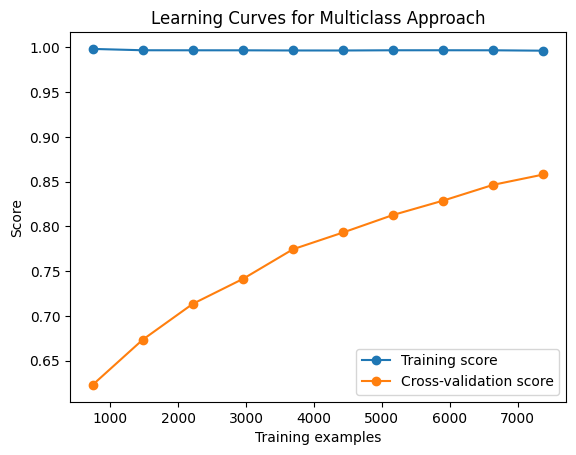

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report

# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
# Learning Curves For Binary Approach
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, binary_X_train_selected, binary_y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

binary_train_scores_mean = np.mean(train_scores, axis=1)
binary_test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves For Binary Approach")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, binary_train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, binary_test_scores_mean, 'o-', label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Learning Curves for Multiclass Approach
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves for Multiclass Approach")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.legend(loc="best")
plt.show()

As we can see from the results;
The multiclass approach is more generalizable with a better learning trend, while the binary transformed approach indicates potential overfitting due to a significant gap between the training and validation scores.

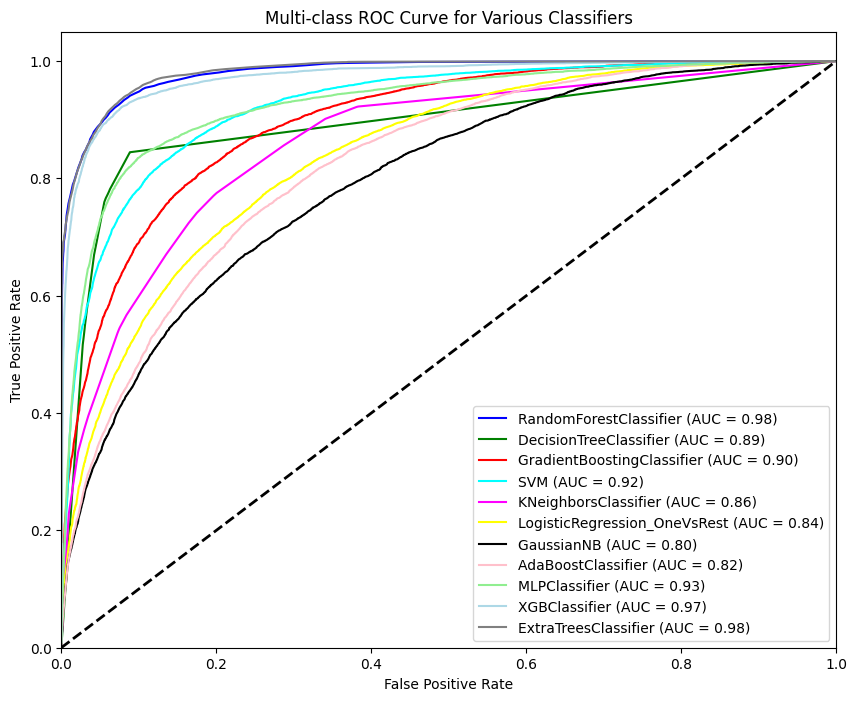

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Sınıflandırıcıları yeniden yapılandır
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_jobs=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # probability=True eklendi
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression_OneVsRest": OneVsRestClassifier(LogisticRegression()),
    "LogisticRegression_OneVsOne": OneVsOneClassifier(LogisticRegression()),
    "GaussianNB": GaussianNB(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "MLPClassifier": MLPClassifier(),
    "XGBClassifier": XGBClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_jobs=-1),
}
# ROC eğrisi için kullanılacak sınıflandırıcılar
classifiers_for_roc = {k: v for k, v in classifiers.items() if k != "LogisticRegression_OneVsOne"}

# Sınıfları ikili format için dönüştür
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# ROC eğrisi için renkler
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray'])

plt.figure(figsize=(10, 8))

# Her bir sınıflandırıcı için ROC AUC hesapla ve çiz
for classifier_name, classifier in classifiers_for_roc.items():
  if hasattr(classifier, 'predict_proba'):
    # Sınıf olasılıklarını tahmin et
    y_probas = cross_val_predict(classifier,  X, y, cv=skf, method='predict_proba', n_jobs=-1)

    # Her sınıf için ROC eğrisi ve alanını hesapla
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_probas[:, i])
        roc_auc[i] = roc_auc_score(y_binarized[:, i], y_probas[:, i])

    # Ortalama ROC AUC hesapla
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Tüm FPR değerleri için interpolasyon yaparak TPR değerlerini hesapla
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Ortalama TPR hesapla ve grafiğe ekle
    mean_tpr /= n_classes
    mean_auc = roc_auc_score(y_binarized, y_probas, average="macro")
    plt.plot(all_fpr, mean_tpr, color=next(colors), label=f'{classifier_name} (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for Various Classifiers')
plt.legend(loc="lower right")
plt.show()


# **SMOTE OverSampler Technique** is not successfull as RandomOverSampler

In [ ]:
# import numpy as np
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Applying SMOTE to the training set
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

# # Training a classifier on the resampled data
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_resampled, y_resampled)

# # Making predictions on the test set
# y_pred = clf.predict(X_test_selected)

# # Evaluating the performance of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# classification_report_output = classification_report(y_test, y_pred)
# print("Classification Report:\n", classification_report_output)


Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       555
           1       0.51      0.48      0.49       314
           2       0.70      0.69      0.70       170
           3       0.58      0.33      0.42       183

    accuracy                           0.64      1222
   macro avg       0.62      0.58      0.59      1222
weighted avg       0.63      0.64      0.63      1222



# Model Results without OverSampler methods are not successfull even with **hybrid Approaches for imbalanced Datasets**

In [ ]:
# from imblearn.ensemble import BalancedBaggingClassifier
# from imblearn.ensemble import EasyEnsembleClassifier
# from sklearn.model_selection import cross_val_score

# hybrid_classifiers = {
#     'BalancedBaggingClassifier': BalancedBaggingClassifier(random_state=23, sampling_strategy='auto'),
#     'EasyEnsembleClassifier': EasyEnsembleClassifier(random_state=23, n_estimators=5,sampling_strategy='not minority')
# }
# for key, cls in hybrid_classifiers.items():
#     training_score = cross_val_score(cls, X_train_selected, y_train, cv=5)
#     cls.fit(X_train_selected, y_train.to_numpy())
#     print("Classifiers: ", cls.__class__.__name__,
#           "Has a training score of", round(training_score.mean(), 2) * 100,
#           "% accuracy score")

Classifiers:  BalancedBaggingClassifier Has a training score of 57.99999999999999 % accuracy score
Classifiers:  EasyEnsembleClassifier Has a training score of 60.0 % accuracy score
